## ANALISIS DE CREDITOS TUYA SA
## PABLO ARGUELLO

In [1]:
#!pip install pycaret


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import itertools
import scipy.stats
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy import stats
import numpy as np
from scipy.stats import median_abs_deviation
#from pyod.models.mad import MAD

import pandas as pd

ruta_excel = r"/content/drive/MyDrive/Segmentacion_CATT.xlsx"
df = pd.read_excel(ruta_excel)

df.describe()

,canal,capturas_tarjetas,aprobacion_tarjetas,tarjetas,capturas_creditos,aprobacion_creditos,cantidad_creditos,monto_creditos,seguros,trafico_transaccional,trafico_clientes,aprovechamiento_de_trafico,contribucion
count,1.440000e+02,144.000000,141.000000,144.000000,144.000000,141.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.419001e+07,553.925347,0.213927,109.684028,112.616319,0.023803,10.135417,27.302725,63.550347,58120.380208,35886.217014,0.010853,919.946729
std,2.231800e+07,562.679015,0.061780,119.865987,119.347516,0.018957,12.767141,33.540927,71.967119,54249.405750,35221.133295,0.010752,1225.155583
min,3.050010e+05,0.000000,0.074470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-112.543940
25%,3.050368e+05,230.437500,0.179160,39.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,226.736218
50%,3.096305e+05,362.750000,0.208660,70.375000,82.750000,0.025850,5.875000,14.877855,42.625000,54978.875000,32614.625000,0.008675,573.531350
75%,5.000000e+07,629.562500,0.250320,131.625000,169.062500,0.035780,14.750000,38.417217,97.500000,88709.500000,53264.500000,0.016120,1086.874077
max,5.100000e+07,3532.250000,0.422890,735.750000,648.750000,0.084860,88.250000,196.504990,280.750000,256355.000000,176842.000000,0.049110,7650.703390


# Validacion comportamiento datos

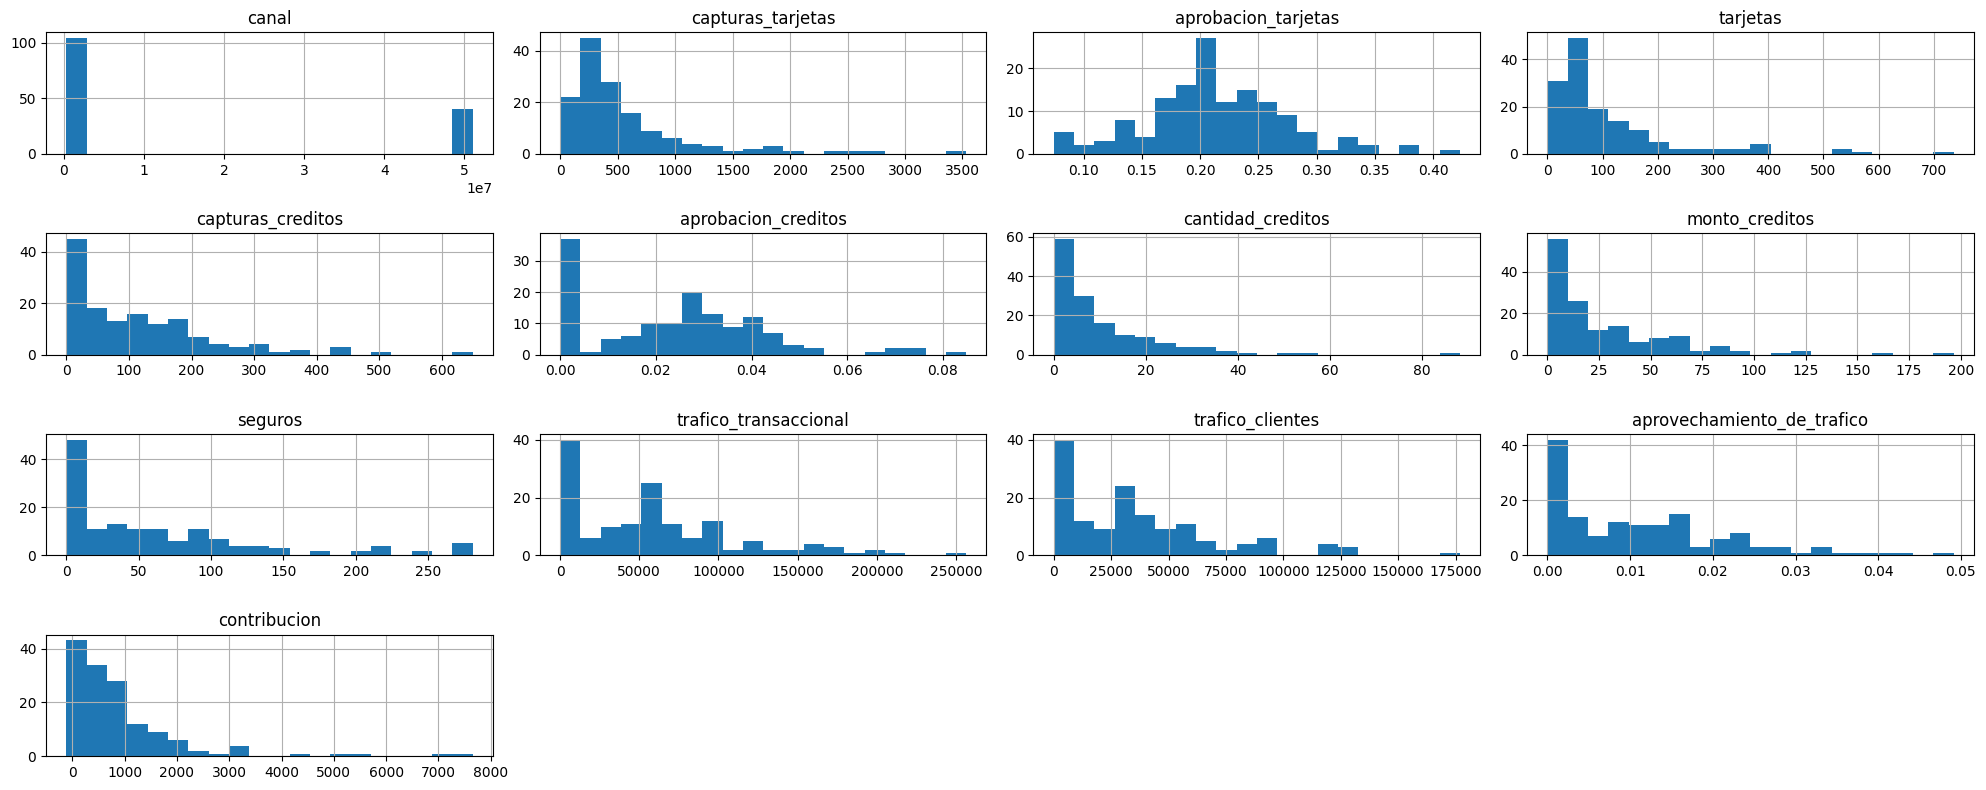

In [4]:
df.hist(bins=20, figsize=(20, 8))
plt.tight_layout()
plt.show()

## Analisis valores faltantes

Resumen de valores faltantes:
                     Missing Values  Percentage
aprobacion_tarjetas               3    2.083333
aprobacion_creditos               3    2.083333


<ipython-input-9-3eee9b68149e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df.index, y='Percentage', data=missing_df, palette='viridis')


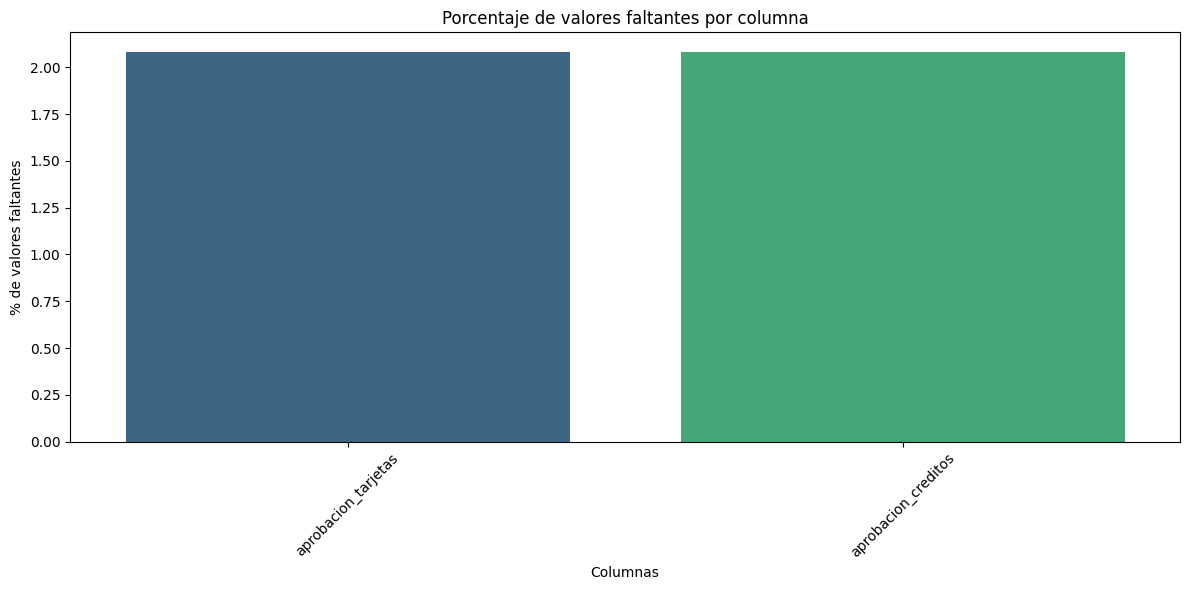

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Resumen general de missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

# Mostrar tabla resumen
print("Resumen de valores faltantes:")
print(missing_df)

# Gráfico de barras del % de missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Percentage', data=missing_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Porcentaje de valores faltantes por columna')
plt.ylabel('% de valores faltantes')
plt.xlabel('Columnas')
plt.tight_layout()
plt.show()


## Analisis de datos por Region

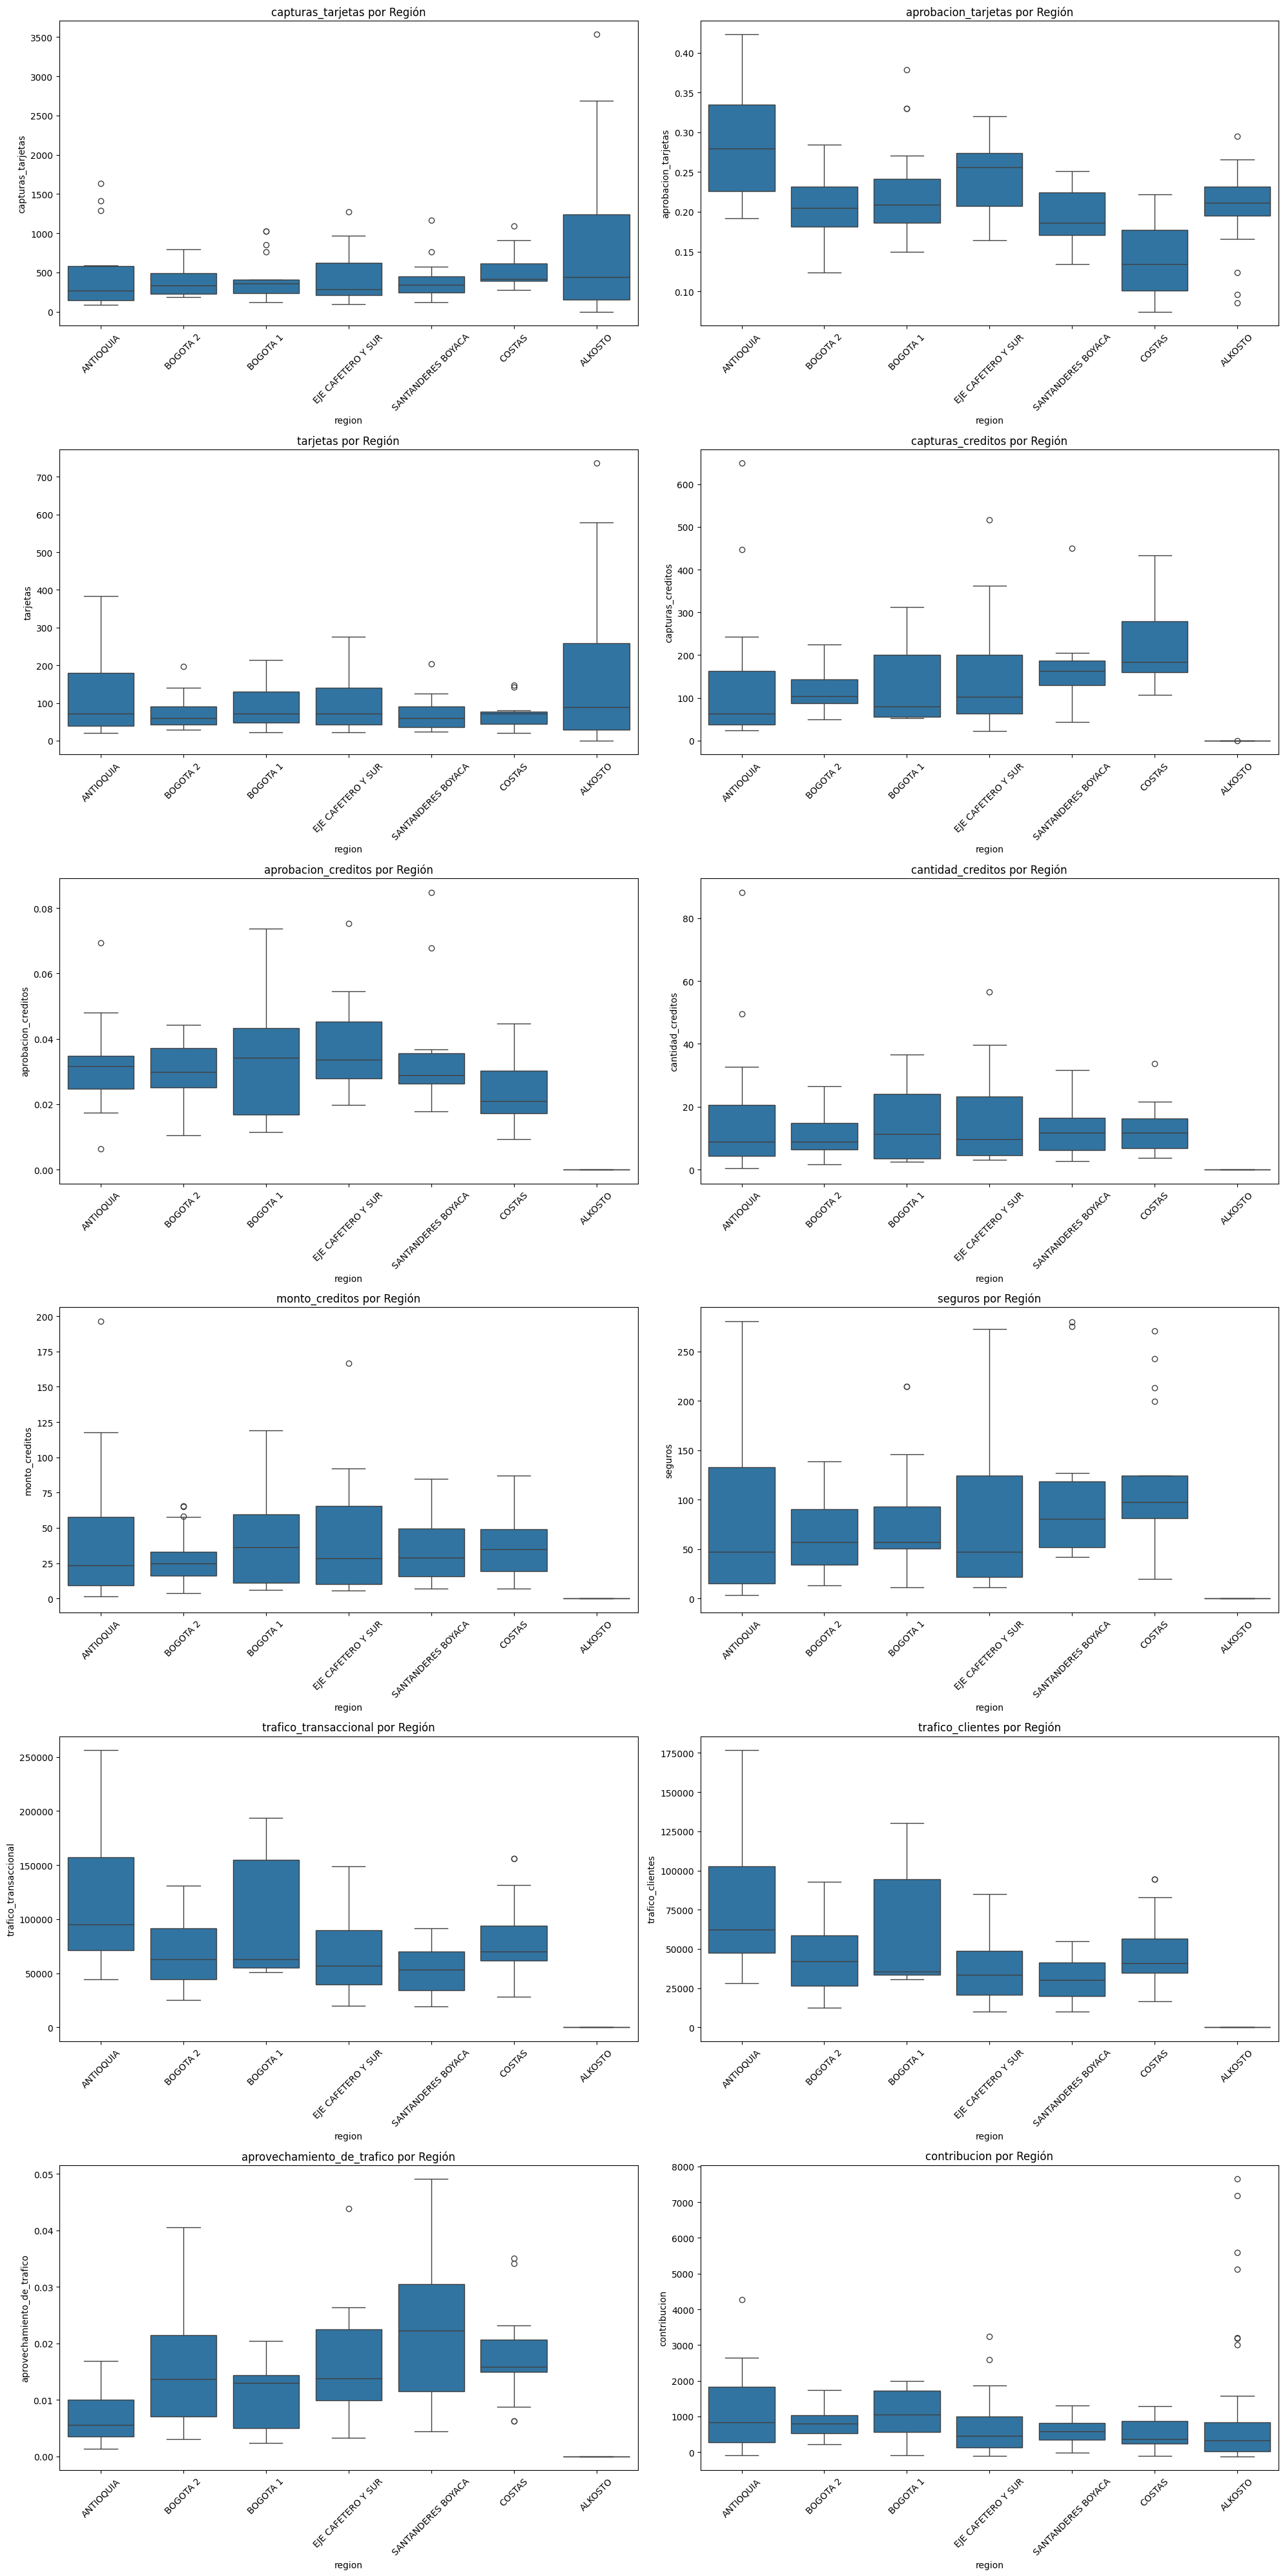

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas numéricas a analizar
columnas_numericas = [
    'capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas',
    'capturas_creditos', 'aprobacion_creditos', 'cantidad_creditos',
    'monto_creditos', 'seguros', 'trafico_transaccional',
    'trafico_clientes', 'aprovechamiento_de_trafico', 'contribucion'
]

# Boxplots por región
plt.figure(figsize=(20, 40))
for i, col in enumerate(columnas_numericas):
    plt.subplot(6, 2, i+1)
    sns.boxplot(data=df, x='region', y=col)
    plt.title(f'{col} por Región')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Eliminacion de datos faltantes

In [3]:
## Se detectan Outliers por una region en especifico "ALKOSTO", Al ser una cantridad dignificativa se retiran
## estos datos
df = df[df['region'] != 'ALKOSTO']


## Analisis de outliers

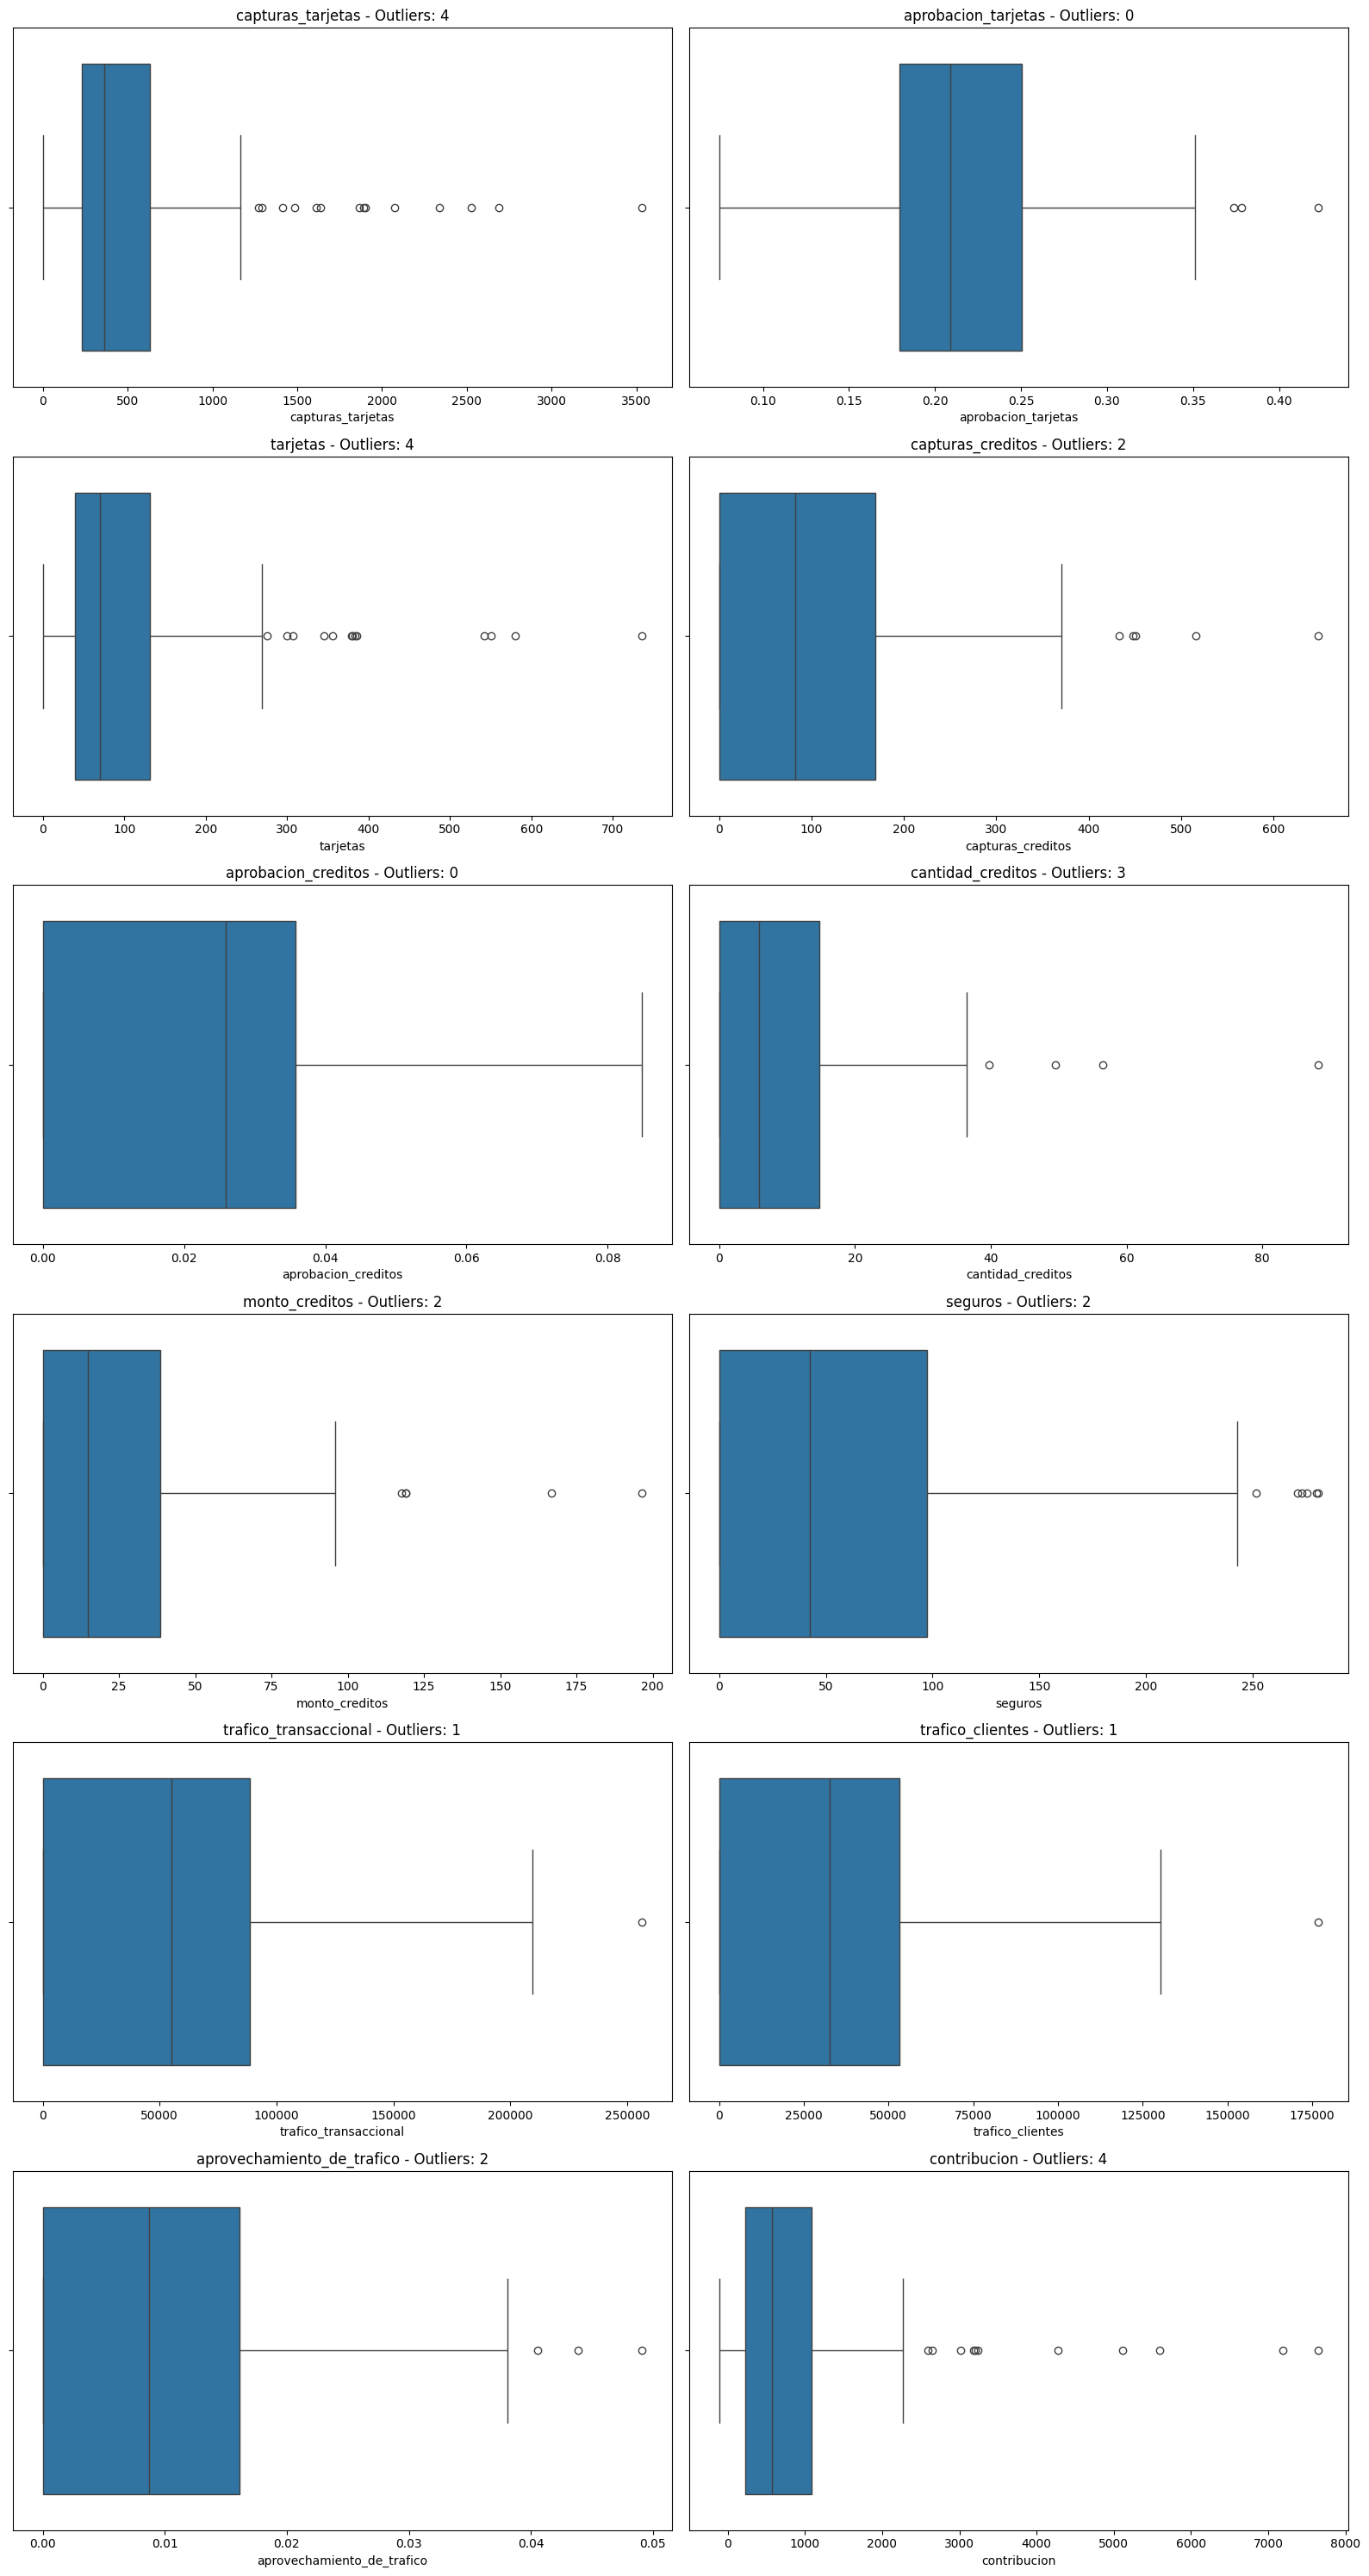

In [7]:
# Asumiendo que df ya está cargado y tiene esas columnas
columnas = [
    'capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas',
    'capturas_creditos', 'aprobacion_creditos', 'cantidad_creditos',
    'monto_creditos', 'seguros', 'trafico_transaccional',
    'trafico_clientes', 'aprovechamiento_de_trafico', 'contribucion'
]

# Calcular Z-Score para todo el DataFrame
df_z = df[columnas].apply(zscore)

# Graficar cada variable con outliers
plt.figure(figsize=(16, 30))
for i, col in enumerate(columnas):
    plt.subplot(6, 2, i+1)
    sns.boxplot(x=df[col])
    outliers = df[np.abs(df_z[col]) > 3]
    plt.title(f'{col} - Outliers: {len(outliers)}')
plt.tight_layout()
plt.show()

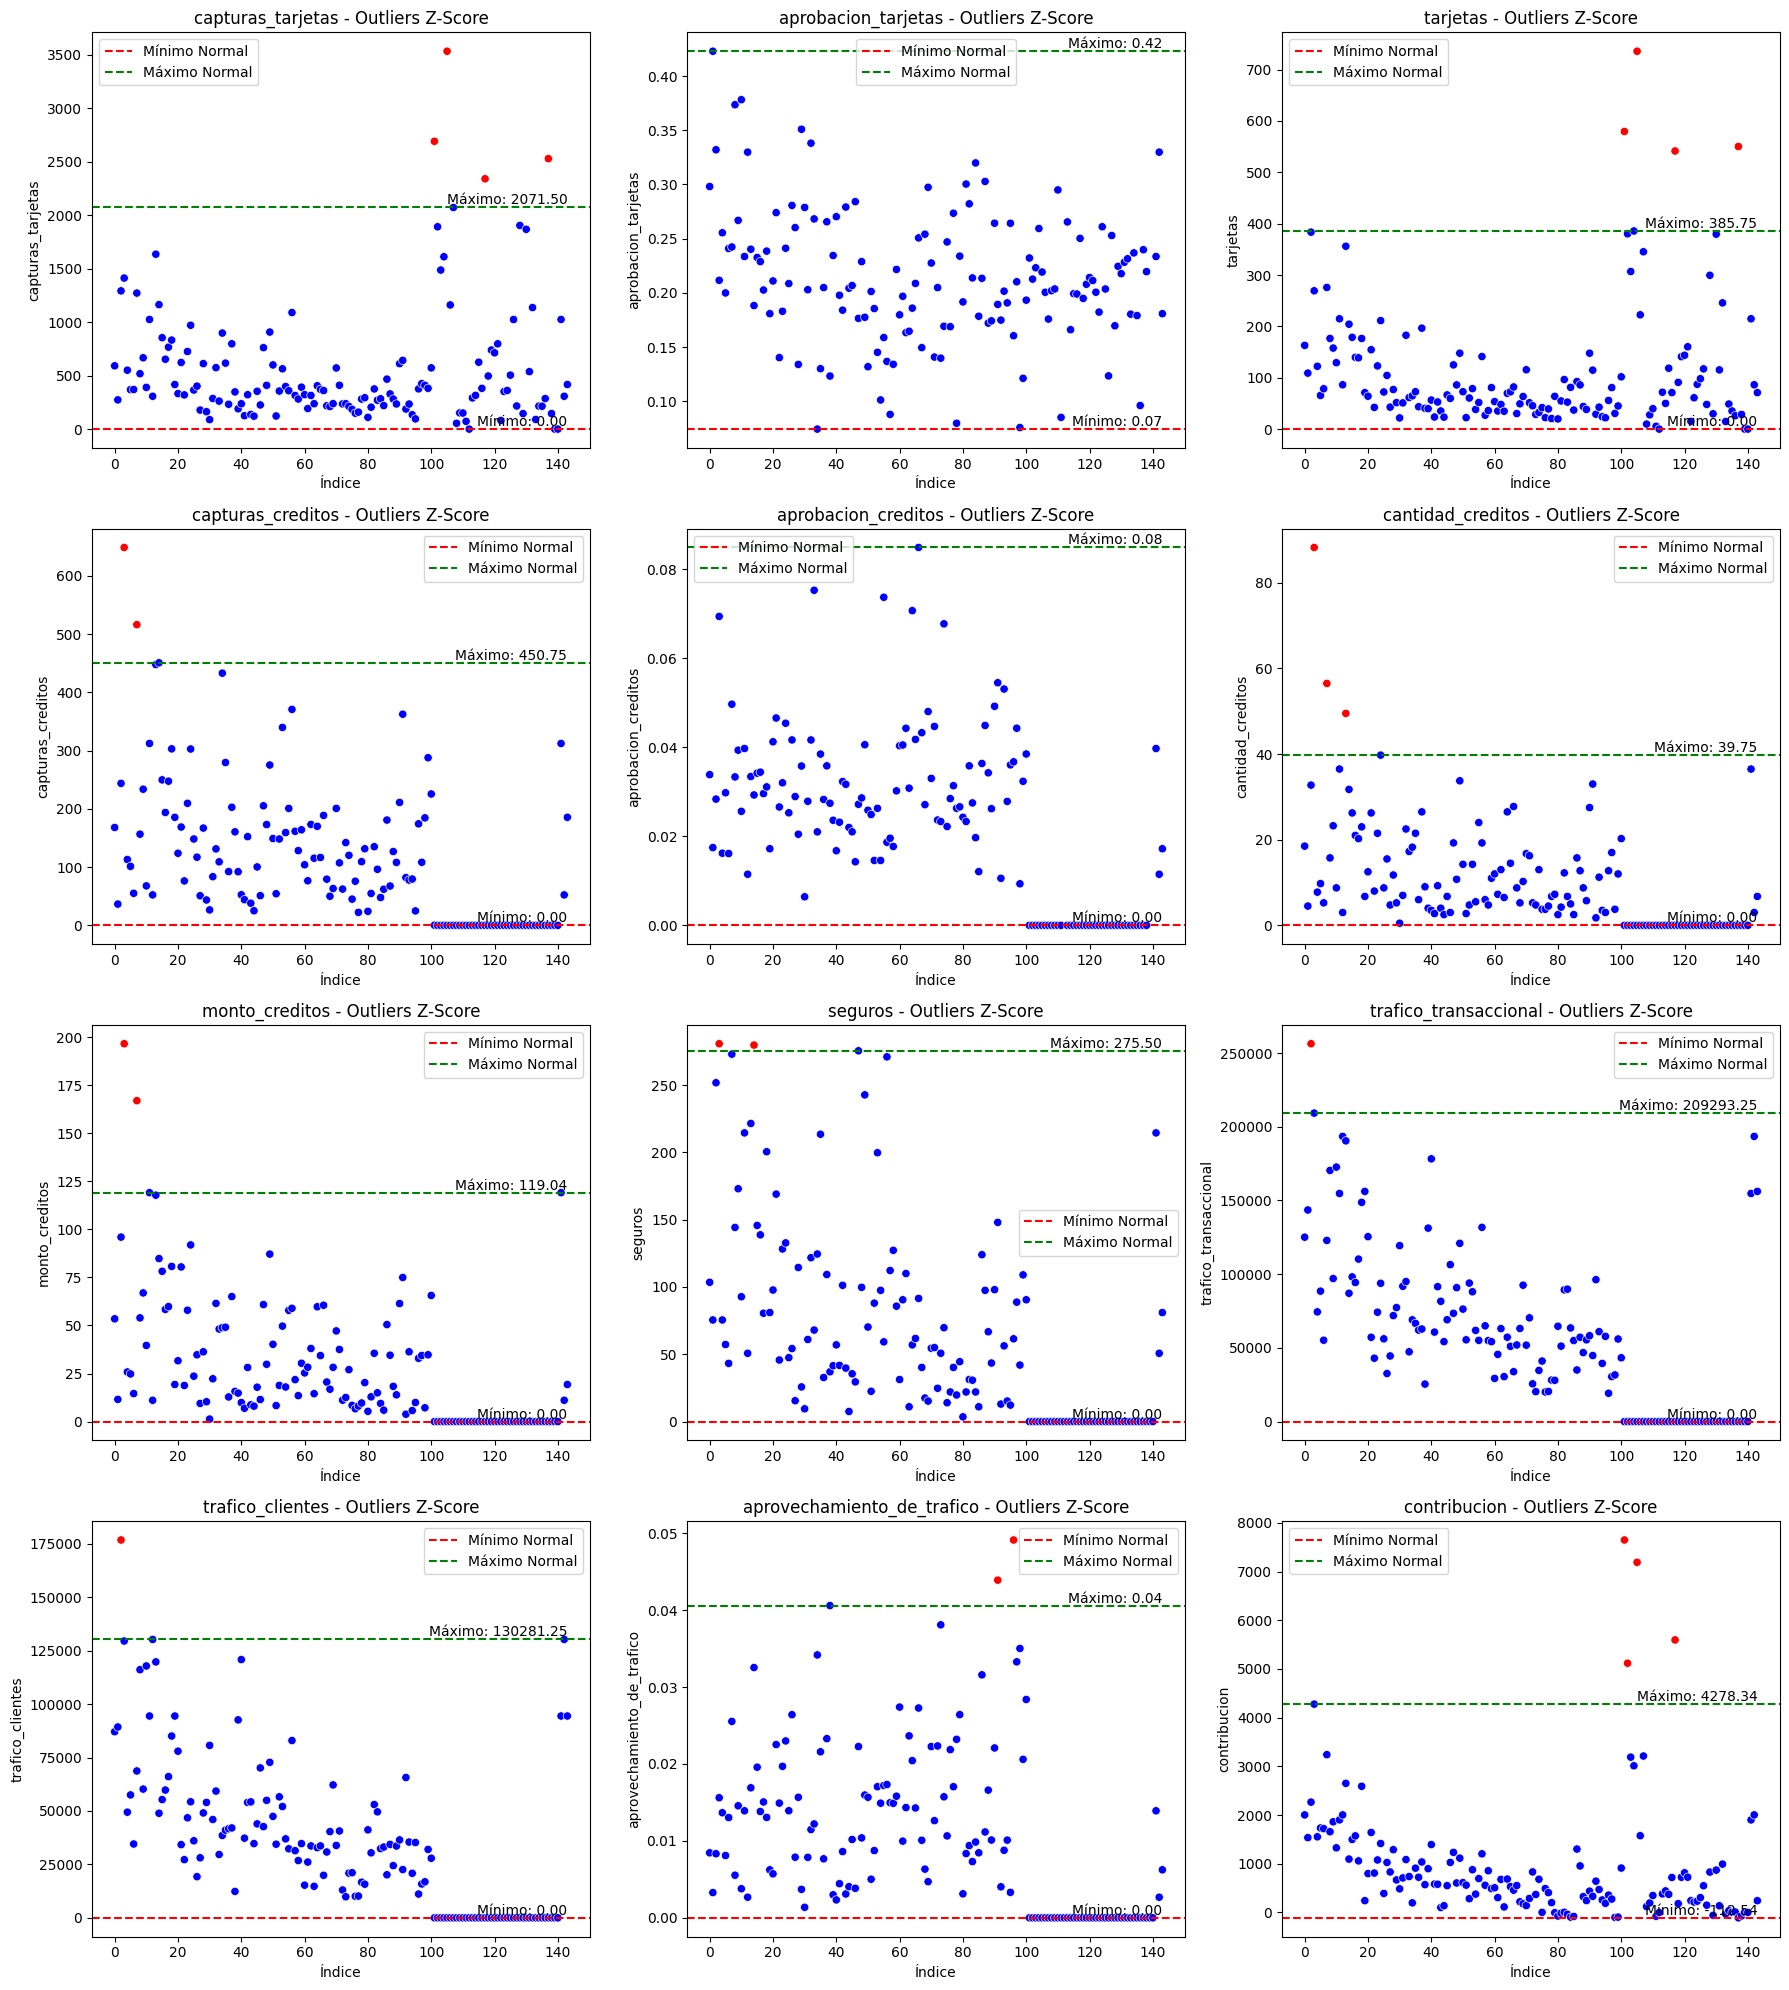

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

# Lista de columnas numéricas
columnas_numericas = [
    'capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas',
    'capturas_creditos', 'aprobacion_creditos', 'cantidad_creditos',
    'monto_creditos', 'seguros', 'trafico_transaccional',
    'trafico_clientes', 'aprovechamiento_de_trafico', 'contribucion'
]

# Calcular z-score
df_z = df[columnas_numericas].apply(zscore)

# Crear subplots
n = len(columnas_numericas)
filas = int(np.ceil(n / 3))
plt.figure(figsize=(18, 5 * filas))

for i, col in enumerate(columnas_numericas):
    # Definir si es outlier
    df['outlier_zscore'] = (np.abs(df_z[col]) > 3).astype(int)

    # Valores min y max no outlier
    min_z = df[col][df['outlier_zscore'] == 0].min()
    max_z = df[col][df['outlier_zscore'] == 0].max()

    # Crear scatterplot
    plt.subplot(filas, 3, i+1)
    sns.scatterplot(x=df.index, y=df[col],
                    hue=df['outlier_zscore'], palette={0: 'blue', 1: 'red'}, legend=False)

    # Líneas de referencia
    plt.axhline(min_z, color='red', linestyle='--', label='Mínimo Normal')
    plt.axhline(max_z, color='green', linestyle='--', label='Máximo Normal')

    # Textos
    plt.text(df.index.max(), min_z, f'Mínimo: {min_z:.2f}', color='black', va='bottom', ha='right')
    plt.text(df.index.max(), max_z, f'Máximo: {max_z:.2f}', color='black', va='bottom', ha='right')

    # Estética
    plt.title(f'{col} - Outliers Z-Score')
    plt.xlabel('Índice')
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()


## Validacion de modelos de aprendizaje no supervisado

<ipython-input-21-ebe62535db28>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


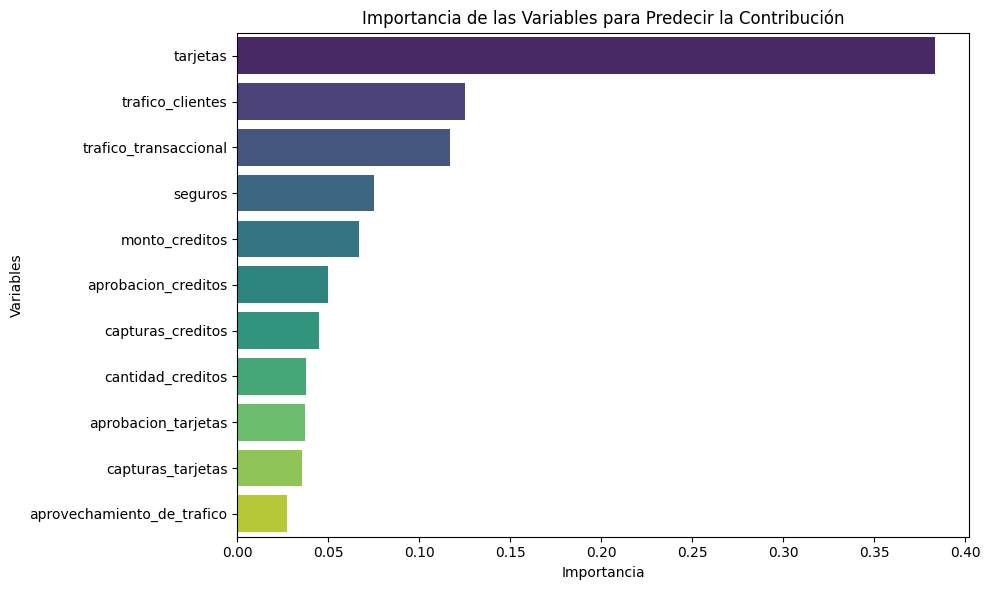

In [21]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Seleccionamos las variables numéricas como features
features = [
    'capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas',
    'capturas_creditos', 'aprobacion_creditos', 'cantidad_creditos',
    'monto_creditos', 'seguros', 'trafico_transaccional',
    'trafico_clientes', 'aprovechamiento_de_trafico'
]

# Definimos X (variables predictoras) e y (target)
X = df[features]
y = df['contribucion']

# Creamos el modelo de regresión RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo
model.fit(X, y)

# Obtenemos la importancia de las variables
importancia = model.feature_importances_

# Creamos un DataFrame para visualizar las importancias
import pandas as pd
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importancia
})

# Ordenamos las características por importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Graficamos la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Importancia de las Variables para Predecir la Contribución')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Selección de las variables numéricas
numerical_features = [
    'capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas',
    'capturas_creditos', 'aprobacion_creditos', 'cantidad_creditos',
    'monto_creditos', 'seguros', 'trafico_transaccional',
    'trafico_clientes', 'aprovechamiento_de_trafico', 'contribucion'
]

# Seleccionar solo las columnas numéricas
X = df[numerical_features]

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



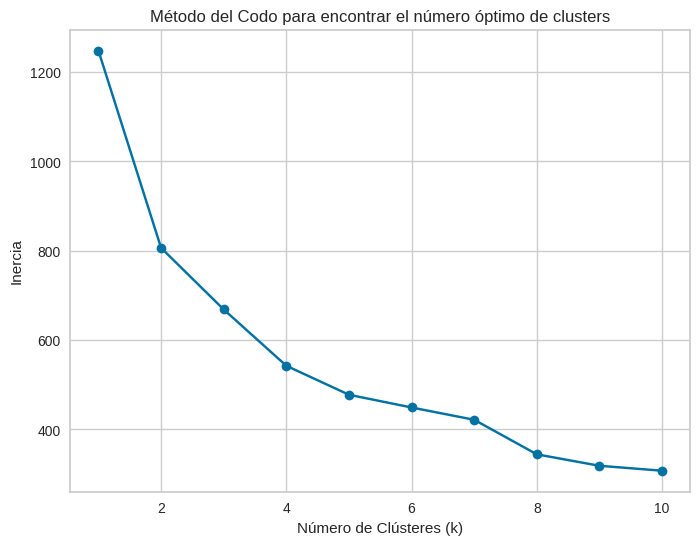

In [11]:
# Determinar el número óptimo de clústeres con el Método del Codo
inertia = []  # Lista para almacenar la inercia

# Probar con diferentes valores de k (por ejemplo, de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.show()


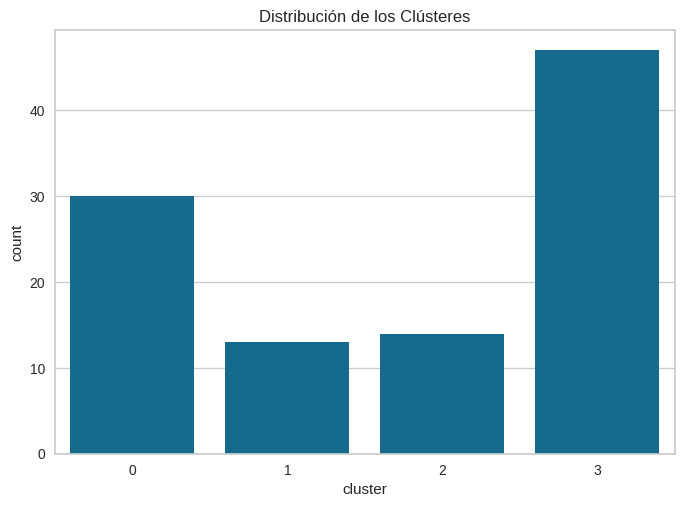

In [12]:
# Asumimos que hemos elegido k=3 (ajústalo según el gráfico del codo)
k = 4
# Entrenar el modelo de K-Means con el número de clústeres seleccionado
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)  # Asignamos el clúster a cada fila

# Ver el resultado de los clústeres
sns.countplot(x='cluster', data=df)
plt.title('Distribución de los Clústeres')
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
score = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.24


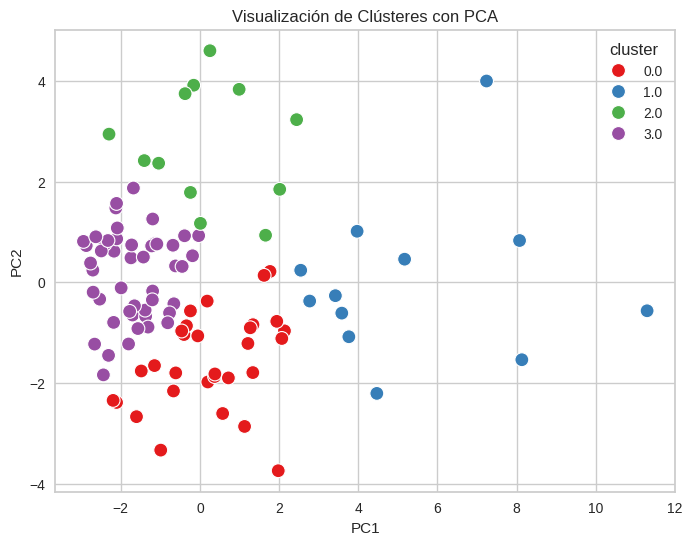

In [14]:
from sklearn.decomposition import PCA

# Reducir las dimensiones a 2 para visualizar los clústeres
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales y los clústeres
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

# Graficar los clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set1', data=df_pca, s=100)
plt.title('Visualización de Clústeres con PCA')
plt.show()


In [16]:
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Agrupar por 'cluster' y calcular la media solo de las columnas numéricas
df_grouped = df[numeric_columns].groupby('cluster').mean()
print(df_grouped)


                 canal  capturas_tarjetas  aprobacion_tarjetas    tarjetas  \
cluster                                                                      
0        462569.266667         509.683333             0.184114   86.675000   
1        305021.692308        1087.884615             0.228915  225.500000   
2        305024.142857         347.482143             0.293660   94.053571   
3        409531.765957         261.617021             0.210349   49.340426   

         capturas_creditos  aprobacion_creditos  cantidad_creditos  \
cluster                                                              
0               200.550000             0.040697          17.875000   
1               359.000000             0.038363          38.230769   
2                98.660714             0.022246           8.071429   
3                88.335106             0.028195           6.664894   

         monto_creditos     seguros  trafico_transaccional  trafico_clientes  \
cluster                       

In [17]:
df_grouped

,canal,capturas_tarjetas,aprobacion_tarjetas,tarjetas,capturas_creditos,aprobacion_creditos,cantidad_creditos,monto_creditos,seguros,trafico_transaccional,trafico_clientes,aprovechamiento_de_trafico,contribucion
cluster,,,,,,,,,,,,,
0,462569.266667,509.683333,0.184114,86.675000,200.550000,0.040697,17.875000,46.486298,102.291667,53788.066667,32093.416667,0.024885,714.253901
1,305021.692308,1087.884615,0.228915,225.500000,359.000000,0.038363,38.230769,104.891668,223.192308,143546.288462,87964.384615,0.017707,2077.327167
2,305024.142857,347.482143,0.293660,94.053571,98.660714,0.022246,8.071429,24.983401,74.035714,147633.964286,97257.196429,0.004758,1191.663206
3,409531.765957,261.617021,0.210349,49.340426,88.335106,0.028195,6.664894,17.524344,45.627660,60057.776596,36163.297872,0.011054,460.161874


In [18]:
# Por región
df[df['cluster'] == 1]['region'].value_counts(normalize=True)

# Por canal
df[df['cluster'] == 1]['canal'].value_counts(normalize=True)


,proportion
canal,
305014,0.153846
305003,0.076923
305004,0.076923
305008,0.076923
305010,0.076923
305017,0.076923
305018,0.076923
305019,0.076923
305022,0.076923


In [19]:
# Suponiendo que tu dataframe se llama df y que ya tiene una columna 'cluster'
cluster_1 = df[df['cluster'] == 1]


In [20]:
cluster_1

,negocio,region,canal,capturas_tarjetas,aprobacion_tarjetas,tarjetas,capturas_creditos,aprobacion_creditos,cantidad_creditos,monto_creditos,seguros,trafico_transaccional,trafico_clientes,aprovechamiento_de_trafico,contribucion,cluster
2,E,ANTIOQUIA,305003,1292.00,0.33203,383.50,243.75,0.02835,32.75,95.94125,251.75,256355.00,176842.00,0.00833,2265.08432,1
3,E,ANTIOQUIA,305004,1411.75,0.21167,269.25,648.75,0.06938,88.25,196.50499,280.75,209293.25,129557.00,0.01561,4278.34350,1
7,E,EJE CAFETERO Y SUR,305008,1271.50,0.24236,275.75,516.25,0.04966,56.50,166.89228,273.00,122920.25,68731.00,0.02553,3239.42755,1
9,E,EJE CAFETERO Y SUR,305010,666.50,0.26692,157.75,233.75,0.03934,23.25,66.91661,173.00,97043.00,60260.75,0.01456,1860.03772,1
11,E,BOGOTA 1,305014,1024.75,0.23361,214.75,312.25,0.03971,36.50,119.04254,214.50,154765.75,94460.50,0.01391,1899.78072,1
13,E,ANTIOQUIA,305017,1634.75,0.24034,356.00,447.75,0.03342,49.50,117.74858,221.50,190455.00,119775.75,0.01690,2650.73157,1
14,E,SANTANDERES BOYACA,305018,1163.25,0.18838,204.25,450.75,0.02928,31.75,84.76110,279.75,87054.25,48953.50,0.03253,1094.62115,1
15,E,BOGOTA 1,305019,854.25,0.23275,178.75,249.75,0.03418,26.25,78.16404,145.75,98155.25,55333.50,0.01958,1496.62725,1
18,E,EJE CAFETERO Y SUR,305022,832.00,0.23859,176.50,303.00,0.03109,23.00,80.69568,200.50,148729.75,85089.75,0.01305,2590.10651,1
24,E,EJE CAFETERO Y SUR,305028,970.75,0.24122,211.25,302.75,0.04539,39.75,91.87120,132.75,93839.75,54315.00,0.02299,1414.69526,1
